In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI_ Heart Diseases Prediction/AI_Dataset.csv")

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Remove records with null values
df.dropna(inplace=True)

# Reset the indices to avoid potential issues
df = df.reset_index(drop=True)

# Standard Scalar (Z-score normalization)
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Outlier Detection and Removal (using z-score method)
z_scores = (df - df.mean()) / df.std()
outliers = (z_scores > 3) | (z_scores < -3)
df_cleaned = df[~outliers.any(axis=1)]

# One-Hot Encoding for categorical variables
categorical_cols = ['chest pain type', 'resting ecg', 'ST slope']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(df_cleaned.head())

# Extracting features and target variable
X = df_encoded.drop('target', axis=1)  # Features
y = df_encoded['target']  # Target variable

# Splitting the dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initial Dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Cleaned Dataset:
        age       sex  

In [ ]:
print(df_encoded.columns.tolist())
num_features = df_encoded.shape[1]
print("Number of features:", num_features)


['age', 'sex', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak', 'target', 'chest pain type_-2.3877698919832504', 'chest pain type_-1.3183509339629012', 'chest pain type_-0.24893197594255195', 'chest pain type_0.8204869820777974', 'resting ecg_-0.8026722930547654', 'resting ecg_0.34676215789008524', 'resting ecg_1.4961966088349359', 'ST slope_-2.6620168055524718', 'ST slope_-1.0232170132051146', 'ST slope_0.6155827791422425', 'ST slope_2.2543825714895998']
Number of features: 20


Initial Dataset:
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
Cleaned Dataset:
        age       sex  

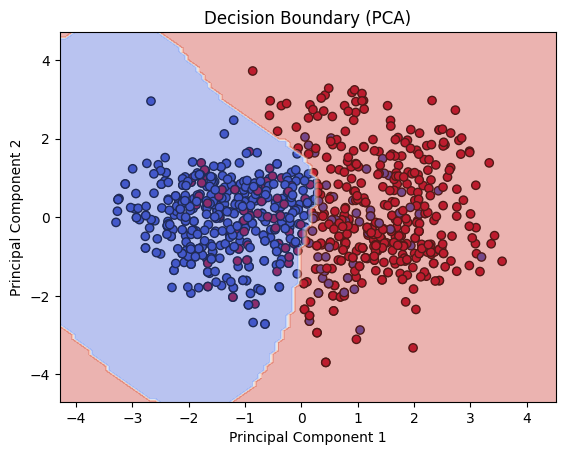

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI_ Heart Diseases Prediction/AI_Dataset.csv")

# Display the first few rows of the dataset
print("Initial Dataset:")
print(df.head())

# Remove records with null values
df.dropna(inplace=True)

# Reset the indices to avoid potential issues
df = df.reset_index(drop=True)

# Standard Scalar (Z-score normalization)
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Outlier Detection and Removal (using z-score method)
z_scores = (df - df.mean()) / df.std()
outliers = (z_scores > 3) | (z_scores < -3)
df_cleaned = df[~outliers.any(axis=1)]

# One-Hot Encoding for categorical variables
categorical_cols = ['chest pain type', 'resting ecg', 'ST slope']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(df_cleaned.head())

# Extracting features and target variable
X = df_encoded.drop('target', axis=1)  # Features
y = df_encoded['target']  # Target variable

# Splitting the dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM model
svm_model = SVC()

# Train, evaluate, and visualize the model
# Training the model
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("SVM Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Apply PCA to reduce the dimensionality to two dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model on PCA-transformed data
svm_model.fit(X_train_pca, y_train)

# Plotting training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting decision boundary
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('Decision Boundary (PCA)')
plt.show()


In [ ]:
SVM

SVM Model Evaluation:
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.8583690987124464
Precision: 0.8257575757575758
Recall: 0.9159663865546218
F1 Score: 0.8685258964143426


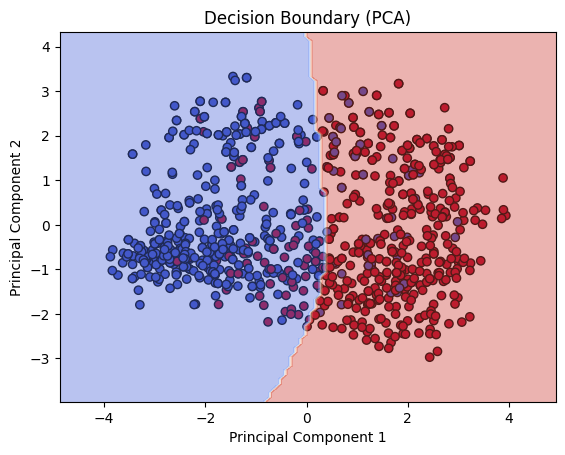

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameters grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto', 0.1, 1]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train SVM model with the best hyperparameters
svm_model = SVC(**best_params)
svm_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("SVM Model Evaluation:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Apply PCA to reduce the dimensionality to two dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plotting training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a meshgrid to visualize decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Transform meshgrid points using PCA
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_points_pca = pca.inverse_transform(meshgrid_points)

# Predict the labels for all points in the meshgrid
Z = svm_model.predict(meshgrid_points_pca)

# Reshape the predictions into the same shape as the meshgrid
Z = Z.reshape(xx.shape)

# Plotting decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.title('Decision Boundary (PCA)')
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Selecting specific columns from the dataset
selected_features = ['resting bp s', 'cholesterol', 'fasting blood sugar', 'max heart rate', 'exercise angina', 'oldpeak']
X_train_subset = X_train[selected_features]
X_test_subset = X_test[selected_features]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

# Define the parameters grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto', 0.1, 1]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train SVM model with the best hyperparameters
svm_model = SVC(**best_params)
svm_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("SVM Model Evaluation:")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


SVM Model Evaluation:
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.7854077253218884
Precision: 0.7593984962406015
Recall: 0.8487394957983193
F1 Score: 0.8015873015873015


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a pipeline with feature scaling and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameters to search over
parameters = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Adjust the range based on your dataset size
    'knn__weights': ['uniform', 'distance']  # Try different weighting schemes
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, parameters, cv=100, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the model with the best parameters
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

# Making predictions
y_pred = best_knn_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("KNN Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally, apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualize the decision boundary if needed
# Note: This is not applicable if using PCA for dimensionality reduction
# Decision boundary visualization is more challenging in high-dimensional spaces
# You may need to choose a subset of features for visualization


Best Parameters: {'knn__n_neighbors': 9, 'knn__weights': 'distance'}
Best Accuracy: 0.9188888888888889
KNN Model Evaluation:
Accuracy: 0.9356223175965666
Precision: 0.9193548387096774
Recall: 0.957983193277311
F1 Score: 0.9382716049382716


In [ ]:
pip install bayesian-optimization


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the objective function for hyperparameter optimization
def knn_cv(n_neighbors, weights_idx):
    weights = ['uniform', 'distance'][int(weights_idx)]
    n_neighbors = int(n_neighbors)

    # Create KNN model with specified hyperparameters
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    # Perform cross-validation and return the mean accuracy
    return cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

# Define the search space for hyperparameters
pbounds = {'n_neighbors': (1, 20), 'weights_idx': (0, 1)}

# Initialize Bayesian optimization
optimizer = BayesianOptimization(
    f=knn_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Perform optimization
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_n_neighbors = int(best_params['n_neighbors'])
best_weights = ['uniform', 'distance'][int(best_params['weights_idx'])]

# Train the final model with the best hyperparameters
final_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)
final_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_knn.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy:", optimizer.max['target'])
print("KNN Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


|   iter    |  target   | n_neig... | weight... |
-------------------------------------------------
| 1         | 0.8525    | 8.116     | 0.9507    |
| 2         | 0.8461    | 14.91     | 0.5987    |
| 3         | 0.8181    | 3.964     | 0.156     |
| 4         | 0.8159    | 2.104     | 0.8662    |
| 5         | 0.8428    | 12.42     | 0.7081    |
| 6         | 0.9096    | 19.79     | 1.0       |
| 7         | 0.8611    | 20.0      | 0.0       |
| 8         | 0.9096    | 19.14     | 1.0       |
| 9         | 0.9096    | 17.55     | 1.0       |
| 10        | 0.8514    | 17.39     | 0.0       |
| 11        | 0.8504    | 18.28     | 0.9978    |
| 12        | 0.8558    | 19.46     | 0.7045    |
| 13        | 0.8859    | 1.354     | 0.4383    |
| 14        | 0.8525    | 8.507     | 0.4874    |
| 15        | 0.8461    | 14.11     | 0.1224    |
Best Parameters: {'n_neighbors': 19.78863101113006, 'weights_idx': 1.0}
Best Accuracy: 0.9095669863411798
KNN Model Evaluation:
Accuracy: 0.9141630901

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

# Define the objective function for hyperparameter optimization
def knn_cv(n_neighbors, weights_idx):
    weights = ['uniform', 'distance'][int(weights_idx)]
    n_neighbors = int(n_neighbors)

    # Create KNN model with specified hyperparameters
    base_knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    # Create Bagging classifier with KNeighborsClassifier as base estimator
    bagging_knn = BaggingClassifier(estimator=base_knn, n_estimators=10, random_state=42)

    # Perform cross-validation and return the mean accuracy
    return cross_val_score(bagging_knn, X_train, y_train, cv=5, scoring='accuracy').mean()

# Define the search space for hyperparameters
pbounds = {'n_neighbors': (1, 20), 'weights_idx': (0, 1)}

# Initialize Bayesian optimization
optimizer = BayesianOptimization(
    f=knn_cv,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Perform optimization
optimizer.maximize(init_points=5, n_iter=10)

# Get the best hyperparameters
best_params = optimizer.max['params']
best_n_neighbors = int(best_params['n_neighbors'])
best_weights = ['uniform', 'distance'][int(best_params['weights_idx'])]

# Train the final model with the best hyperparameters
base_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)
final_knn = BaggingClassifier(estimator=base_knn, n_estimators=10, random_state=42)
final_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_knn.predict(X_test)

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Accuracy:", optimizer.max['target'])
print("KNN Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


|   iter    |  target   | n_neig... | weight... |
-------------------------------------------------
| 1         | 0.8484    | 8.116     | 0.9507    |
| 2         | 0.8548    | 14.91     | 0.5987    |
| 3         | 0.8484    | 3.964     | 0.156     |
| 4         | 0.8581    | 2.104     | 0.8662    |
| 5         | 0.8516    | 12.42     | 0.7081    |
| 6         | 0.8581    | 2.155     | 0.8983    |
| 7         | 0.8591    | 1.0       | 1.0       |
| 8         | 0.8613    | 19.1      | 0.3824    |
| 9         | 0.8591    | 17.54     | 0.9983    |
| 10        | 0.8613    | 19.92     | 0.9999    |
| 11        | 0.8602    | 20.0      | 0.0       |
| 12        | 0.8591    | 17.91     | 0.0       |
| 13        | 0.8591    | 18.91     | 0.9986    |
| 14        | 0.8548    | 16.46     | 0.0       |
| 15        | 0.8591    | 1.0       | 0.0       |
Best Parameters: {'n_neighbors': 19.104366983327242, 'weights_idx': 0.38242997324233985}
Best Accuracy: 0.8612903225806452
KNN Model Evaluation:
Accur

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Model Evaluation:
Accuracy: 0.8626609442060086
Precision: 0.8222222222222222
Recall: 0.9327731092436975
F1 Score: 0.874015748031496


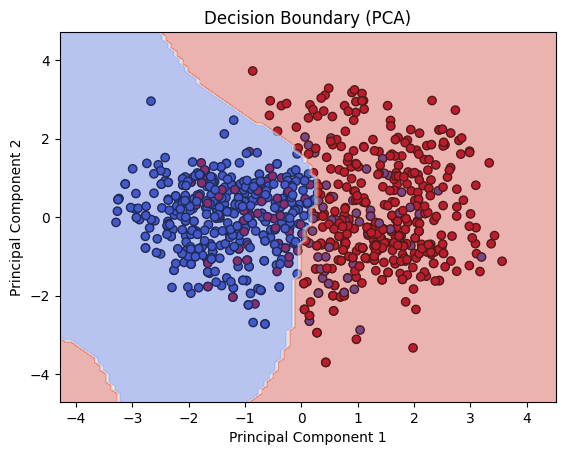

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize SVM model
svm_model = SVC()

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Train, evaluate, and visualize the model with the best parameters
best_svm_model = grid_search.best_estimator_

# Making predictions
y_pred = best_svm_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("SVM Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Apply PCA to reduce the dimensionality to two dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model on PCA-transformed data
best_svm_model.fit(X_train_pca, y_train)

# Plotting training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plotting decision boundary
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = best_svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='coolwarm')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('Decision Boundary (PCA)')
plt.show()


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI_ Heart Diseases Prediction/AI_Dataset.csv")

# Remove records with null values
df.dropna(inplace=True)

# Reset the indices to avoid potential issues
df = df.reset_index(drop=True)

# Extracting features and target variable
X = df["content"]  # Text data
y = df['target']  # Target variable

# Splitting the dataset into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize and encode input data
X_train_encoded = tokenizer(X_train.tolist(), padding=True, truncation=True, return_tensors='pt')
X_test_encoded = tokenizer(X_test.tolist(), padding=True, truncation=True, return_tensors='pt')

# Model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

# Initialize optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model
model.train()
for epoch in range(3):  # Adjust the number of epochs as needed
    optimizer.zero_grad()
    outputs = model(input_ids=X_train_encoded.input_ids, attention_mask=X_train_encoded.attention_mask, labels=y_train)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(input_ids=X_test_encoded.input_ids, attention_mask=X_test_encoded.attention_mask)
    logits = outputs.logits
    y_pred = np.argmax(logits.detach().numpy(), axis=1)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualization (if applicable)
# You can add visualization code here based on your specific requirements


KeyError: 'content'

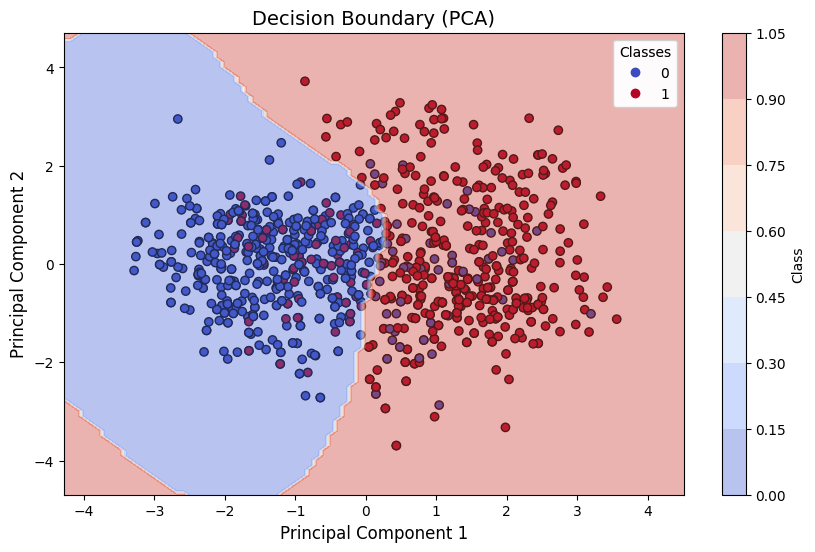

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting training data
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Training Data')
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)

# Adding legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes", fontsize=10)
ax.add_artist(legend1)

# Plotting decision boundary
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
decision_boundary = ax.contourf(xx1, xx2, Z, alpha=0.4, cmap='coolwarm')

# Customizing decision boundary legend
cb = plt.colorbar(decision_boundary, ax=ax)
cb.set_label('Class', fontsize=10)
cb.ax.tick_params(labelsize=10)

# Setting plot title
plt.title('Decision Boundary (PCA)', fontsize=14)
plt.show()


SVM Model Evaluation:
Accuracy: 0.8755364806866953
Precision: 0.835820895522388
Recall: 0.9411764705882353
F1 Score: 0.8853754940711462


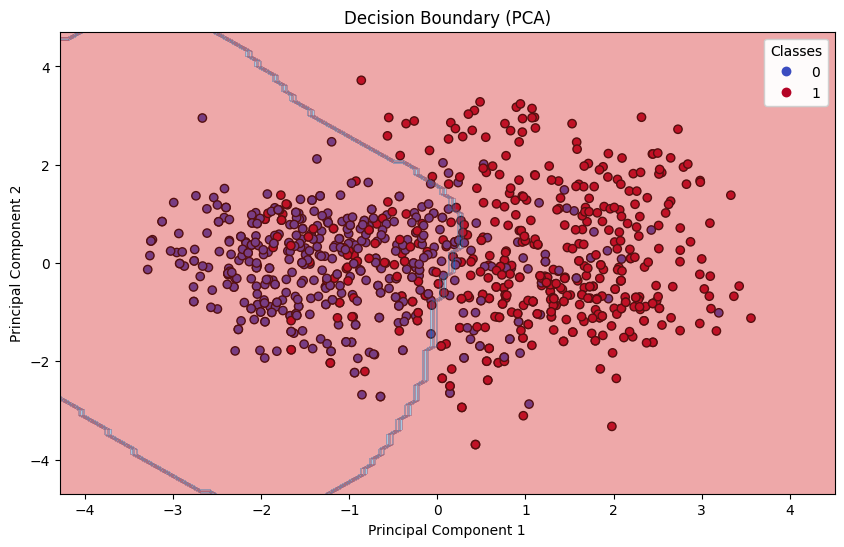

In [ ]:
# Initialize SVM model
svm_model = SVC()

# Training the model
svm_model.fit(X_train, y_train)

# Making predictions
y_pred = svm_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print("SVM Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Apply PCA to reduce the dimensionality to two dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM model on PCA-transformed data
svm_model.fit(X_train_pca, y_train)

# Define colors for the scatter plot and decision boundary
scatter_colors = ['tab:purple', 'tab:green']
boundary_colors = ['tab:red', 'tab:blue']

# Plotting training data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', label='Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adding legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Plotting decision boundary
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = svm_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, colors=boundary_colors)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.title('Decision Boundary (PCA)')
plt.show()